In [1]:
import pymongo 
import json
import pandas as pd

In [2]:
client = pymongo.MongoClient("mongodb://localhost:27017/")

In [3]:
cms = client["cms"]

In [4]:
cms.posts.drop()

In [5]:
posts = cms["posts"]

In [6]:
with open('C://Users/ISHA/Downloads/post_data.json') as file:
    file_data = json.load(file)
posts.insert_many(file_data, ordered=False, bypass_document_validation=True)

In [7]:
posts.find_one()

{'_id': ObjectId('6198aefd3be532e61ab6e65f'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False}

In [120]:
n = posts.count()

<ipython-input-120-20df16449e06>:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  n = posts.count()


In [41]:
# number of posts in each category
posts_cat = posts.aggregate([{"$group": {"_id": "$Category","count": {"$sum": 1}}},{"$sort": {"_id.Category": 1,"count": -1}}])

In [37]:
pc_df = pd.DataFrame(list(posts_cat))

In [38]:
list(pc_df['_id'])

['arts', 'fashion', 'lifestyle', 'movies', 'educational', 'politics', 'sports']

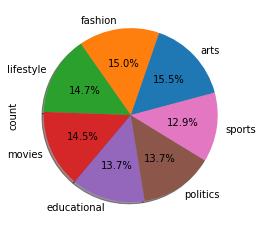

In [39]:
pc_df.plot.pie(y='count',labels = pc_df['_id'],autopct='%1.1f%%',startangle=15, shadow = True,legend=False)

In [42]:
print("The three most common Categories are:")
for i in range(3):
    print(posts_cat.next())

The three most common Categories are:
{'_id': 'arts', 'count': 311}
{'_id': 'fashion', 'count': 300}
{'_id': 'lifestyle', 'count': 294}


In [246]:
# number of posts in each category
pol_sta = posts.aggregate([{"$match": {"Category": "politics"}},{"$group": {"_id": "$status","count": {"$sum": 1}}}])

In [242]:
ps_df = pd.DataFrame(list(pol_sta))

In [243]:
ps_df

,_id,count
0,private,148
1,public,126


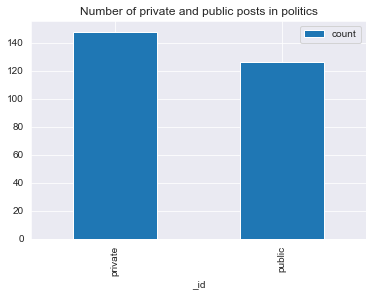

In [244]:
ps_df.plot.bar(x='_id',y='count',title = "Number of private and public posts in politics")

In [247]:
for i in range(2):
    print(pol_sta.next())

{'_id': 'private', 'count': 148}
{'_id': 'public', 'count': 126}


# date and time analysis

In [48]:
cms.posts.update_many({}, {'$set': {"hour": 0 }});
cms.posts.update_many({}, {'$set': {"year": 0}});

In [49]:
for data in posts.find({}):
    posts.update_one({"_id":data['_id']},{'$set':{ 'hour' : data['creationDate'].split('T')[1].split(':')[0],'year' : data['creationDate'].split('T')[0].split('-')[0] }})

In [101]:
# which year had the most posts 
posts_yr = posts.aggregate([{"$group": {"_id": "$year","count": {"$sum": 1}}},{"$sort": {"_id.year": 1,"count": 1}}])

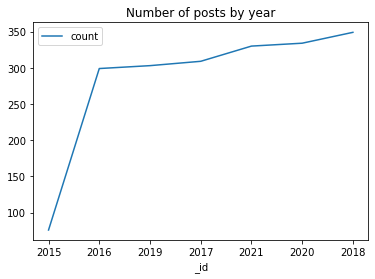

In [100]:
py_df = pd.DataFrame(list(posts_yr))
py_df.plot.line(x='_id',y='count',title = "Number of posts by year")

In [102]:
for i in range(7):
    print(posts_yr.next())

{'_id': '2015', 'count': 76}
{'_id': '2016', 'count': 299}
{'_id': '2019', 'count': 303}
{'_id': '2017', 'count': 309}
{'_id': '2021', 'count': 330}
{'_id': '2020', 'count': 334}
{'_id': '2018', 'count': 349}


In [103]:
# which hour most posted
posts_hr = posts.aggregate([{"$group": {"_id": "$hour","count": {"$sum": 1}}},{"$sort": {"_id.hour": 1,"count": -1}}])

In [104]:
for i in range(3):
    print(posts_hr.next())

{'_id': '00', 'count': 103}
{'_id': '08', 'count': 101}
{'_id': '02', 'count': 99}


In [105]:
# 00 which category
cat_00 = posts.aggregate([{"$match": {"hour": "00"}},{"$group": {"_id": "$Category","count": {"$sum": 1}}},{"$sort": {"_id.Category": 1,"count": -1}}])

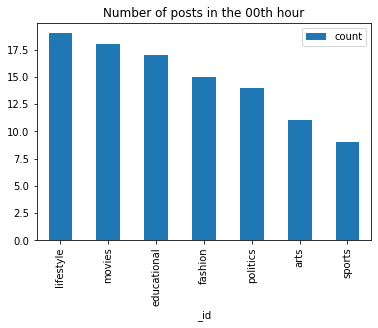

In [106]:
c0_df = pd.DataFrame(list(cat_00))
c0_df.plot.bar(x='_id',y='count', title = "Number of posts in the 00th hour")

In [64]:
for i in range(7):
    print(cat_00.next())

{'_id': 'lifestyle', 'count': 19}
{'_id': 'movies', 'count': 18}
{'_id': 'educational', 'count': 17}
{'_id': 'fashion', 'count': 15}
{'_id': 'politics', 'count': 14}
{'_id': 'arts', 'count': 11}
{'_id': 'sports', 'count': 9}


In [65]:
## comments allowed number
com = posts.count_documents({'allowComments':True})

In [66]:
print("The number of posts that allow comments on it,",com)

The number of posts that allow comments on it, 964


Text(0, 0.5, 'No, of posts')

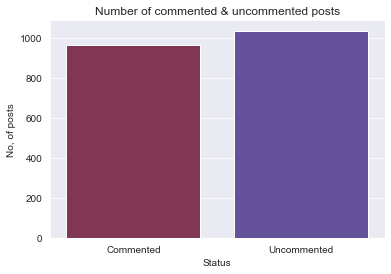

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['Commented', 'Uncommented']
y = [com, n-com]

sns.barplot(x, y,palette='twilight_r')
plt.title("Number of commented & uncommented posts")
plt.xlabel("Status")
plt.ylabel("No, of posts")

In [124]:
cms.posts.update_many({}, {'$set': {"length_of_heading": 0}});

In [125]:
for data in posts.find({}):
    posts.update_one({"_id":data['_id']},{'$set':{ 'length_of_heading' : len(data['title'].split(' '))}})

In [167]:
## length of the title
len_titles = posts.aggregate([{"$group": {"_id": "$length_of_heading","count": {"$sum": 1}}},{"$sort": {"_id.length_of_heading": 1,"count": -1}}])

In [157]:
len_titles 

In [156]:
for i in range(5):
    print(len_titles.next())

{'_id': 3, 'count': 355}
{'_id': 4, 'count': 345}
{'_id': 1, 'count': 343}
{'_id': 5, 'count': 337}
{'_id': 6, 'count': 336}


In [168]:
title_df = pd.DataFrame(list(len_titles))
title_df


,_id,count
0,3,355
1,4,345
2,1,343
3,5,337
4,6,336
5,2,284


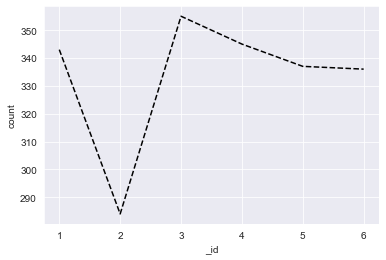

In [197]:
ax = sns.lineplot(x='_id', y='count', data=title_df,color ='black')
ax.lines[0].set_linestyle("--")

plt.show()

In [162]:
# number of posts with tags > 0
tags = posts.aggregate([{"$group":{"_id": "$tags","count": {"$sum": 1}}},{"$sort": {"_id.tags": 1,"count": -1}}])

In [17]:
for i in range(10):
    print(tags.next())

{'_id': 3, 'count': 203}
{'_id': 5, 'count': 195}
{'_id': 4, 'count': 192}
{'_id': 2, 'count': 187}
{'_id': 7, 'count': 186}
{'_id': 1, 'count': 185}
{'_id': 8, 'count': 184}
{'_id': 6, 'count': 178}
{'_id': 0, 'count': 174}
{'_id': 10, 'count': 169}


In [175]:
cat_tags = posts.find({'tags': {'$gt':0}},{'Category':1})

In [180]:
# category that tags the most
cat_tags = posts.aggregate([{"$match": {"tags": {"$gt":0}}},{"$group":{"_id": "$Category","count": {"$sum": 1}}},{"$sort": {"_id.tags": 1,"count": -1}}])

In [181]:
ct_df = pd.DataFrame(list(cat_tags))
ct_df

,_id,count
0,arts,276
1,fashion,276
2,movies,264
3,lifestyle,262
4,politics,258
5,educational,255
6,sports,235


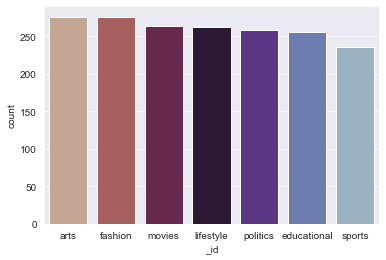

In [184]:
sns.barplot(x='_id',y='count',data = ct_df,palette='twilight_r')

In [113]:
for i in range(3):
    print(cat_tags.next())

{'_id': 'arts', 'count': 276}
{'_id': 'fashion', 'count': 276}
{'_id': 'movies', 'count': 264}


In [199]:
# which category uses the most filters
cat_fs = posts.aggregate([{"$match": {"filteredPicture": True}},{"$group":{"_id": "$Category","count": {"$sum": 1}}},{"$sort": {"_id.tags": 1,"count": -1}}])

In [200]:
for i in range(7):
    print(cat_fs.next())

{'_id': 'fashion', 'count': 159}
{'_id': 'movies', 'count': 154}
{'_id': 'arts', 'count': 146}
{'_id': 'lifestyle', 'count': 136}
{'_id': 'educational', 'count': 135}
{'_id': 'politics', 'count': 131}
{'_id': 'sports', 'count': 117}


In [47]:
cms.posts.update_many({}, {'$set': {"length_of_des": 0}});
for data in posts.find({}):
    posts.update_one({"_id":data['_id']},{'$set':{ 'length_of_des' : len(data['description'].split(' '))}})

In [121]:
# which category has lengthy descriptions
cat_des = posts.aggregate([{"$match": {"length_of_des": {"$gte":60}}},{"$group":{"_id": "$Category","count": {"$sum": 1}}},{"$sort": {"_id.tags": 1,"count": -1}}])

In [122]:
for i in range(7):
    print(cat_des.next())

{'_id': 'arts', 'count': 178}
{'_id': 'fashion', 'count': 161}
{'_id': 'movies', 'count': 159}
{'_id': 'educational', 'count': 156}
{'_id': 'lifestyle', 'count': 156}
{'_id': 'politics', 'count': 146}
{'_id': 'sports', 'count': 130}


In [203]:
posts.find_one()

{'_id': ObjectId('6198aefd3be532e61ab6e65f'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'length_of_heading': 5,
 'hour': '20',
 'year': '2017'}

In [236]:
posts_hr = posts.aggregate([{"$group": {"_id": ["$hour","$Category"],"count": {"$sum": 1}}},{"$sort": {"_id.hour": 1,"count": -1}}])

In [237]:
postshr_df = pd.DataFrame(posts_hr)

In [238]:
split_df = pd.DataFrame(postshr_df ['_id'].to_list(), columns = ['hour', 'category'])
df = pd.concat([split_df, postshr_df['count']], axis=1)

In [249]:
df

,hour,category,count
0,11,arts,23
1,08,politics,21
2,11,educational,20
3,16,lifestyle,20
4,10,fashion,19
...,...,...,...
163,13,sports,5
164,22,politics,5
165,06,sports,5
166,11,lifestyle,4


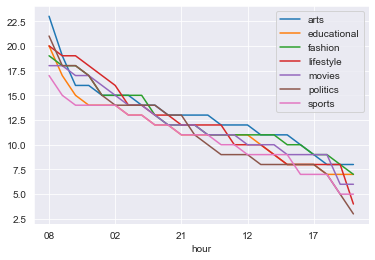

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for key, grp in df.groupby(['category']):
    ax = grp.plot(ax=ax, kind='line', x='hour', y='count', label=key)

plt.legend(loc='best')
plt.show()